# Categorical Regression using Bayesian Analysis

### Imports

In [9]:
import seaborn as sns
import pandas as pd
import arviz as az
import bambi as bmb
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Dataset

We use the classic “iris” dataset, which contains samples from 3 different species of iris plants. Using properties of the plant, we will try to model its species.

In [4]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


The dataset includes four different properties of the plants: it’s sepal length, sepal width, petal length, and petal width. There are 3 different class possibilities: setosa, versicolor, and virginica.

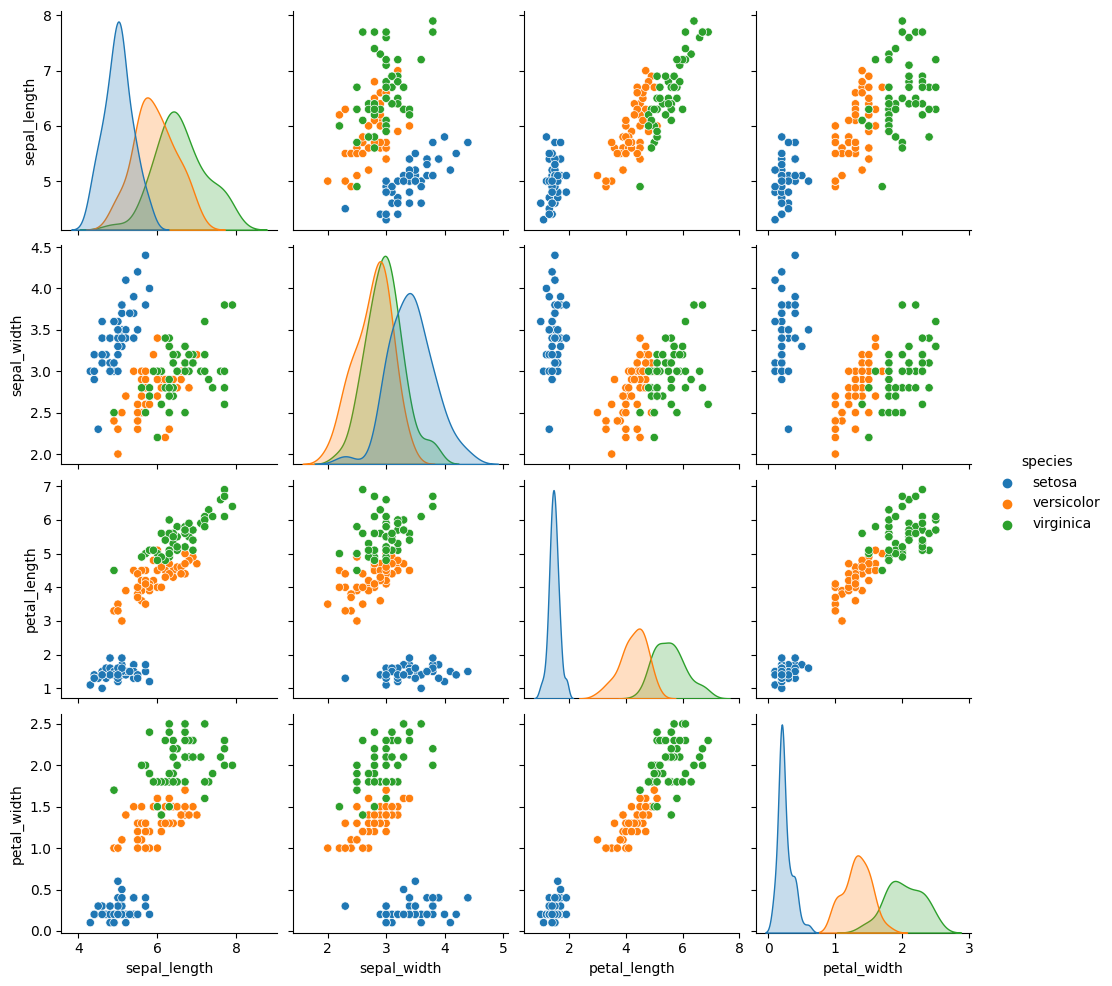

In [10]:
sns.pairplot(iris, hue="species");

## Model

We can see the three species have several distinct characteristics, which our linear model can capture to distinguish between them.

In [11]:
model = bmb.Model(
    "species ~ sepal_length + sepal_width + petal_length + petal_width", 
    iris, 
    family="categorical",
)
idata = model.fit()
az.summary(idata)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, sepal_length, sepal_width, petal_length, petal_width]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 45 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept[versicolor],-7.294,8.050,-22.080,8.017,0.236,0.189,1161.0,1061.0,1.0
Intercept[virginica],-23.041,9.723,-41.640,-5.048,0.282,0.214,1219.0,1039.0,1.0
petal_length[versicolor],1.067,0.904,-0.550,2.796,0.026,0.018,1235.0,1333.0,1.0
petal_length[virginica],4.032,1.088,1.900,5.951,0.029,0.021,1440.0,1081.0,1.0
petal_width[versicolor],1.944,2.088,-2.226,5.490,0.065,0.050,1049.0,991.0,1.0
petal_width[virginica],9.028,2.275,4.475,13.153,0.064,0.045,1254.0,1298.0,1.0
sepal_length[versicolor],3.204,1.738,0.046,6.576,0.054,0.039,1059.0,1205.0,1.0
sepal_length[virginica],2.385,1.794,-0.983,5.676,0.058,0.043,974.0,1297.0,1.0
sepal_width[versicolor],-4.694,1.935,-8.511,-1.282,0.062,0.044,971.0,1104.0,1.0
sepal_width[virginica],-6.567,2.348,-11.322,-2.422,0.071,0.052,1125.0,1189.0,1.0


In [14]:
SEED = 1234
az.style.use("arviz-darkgrid")

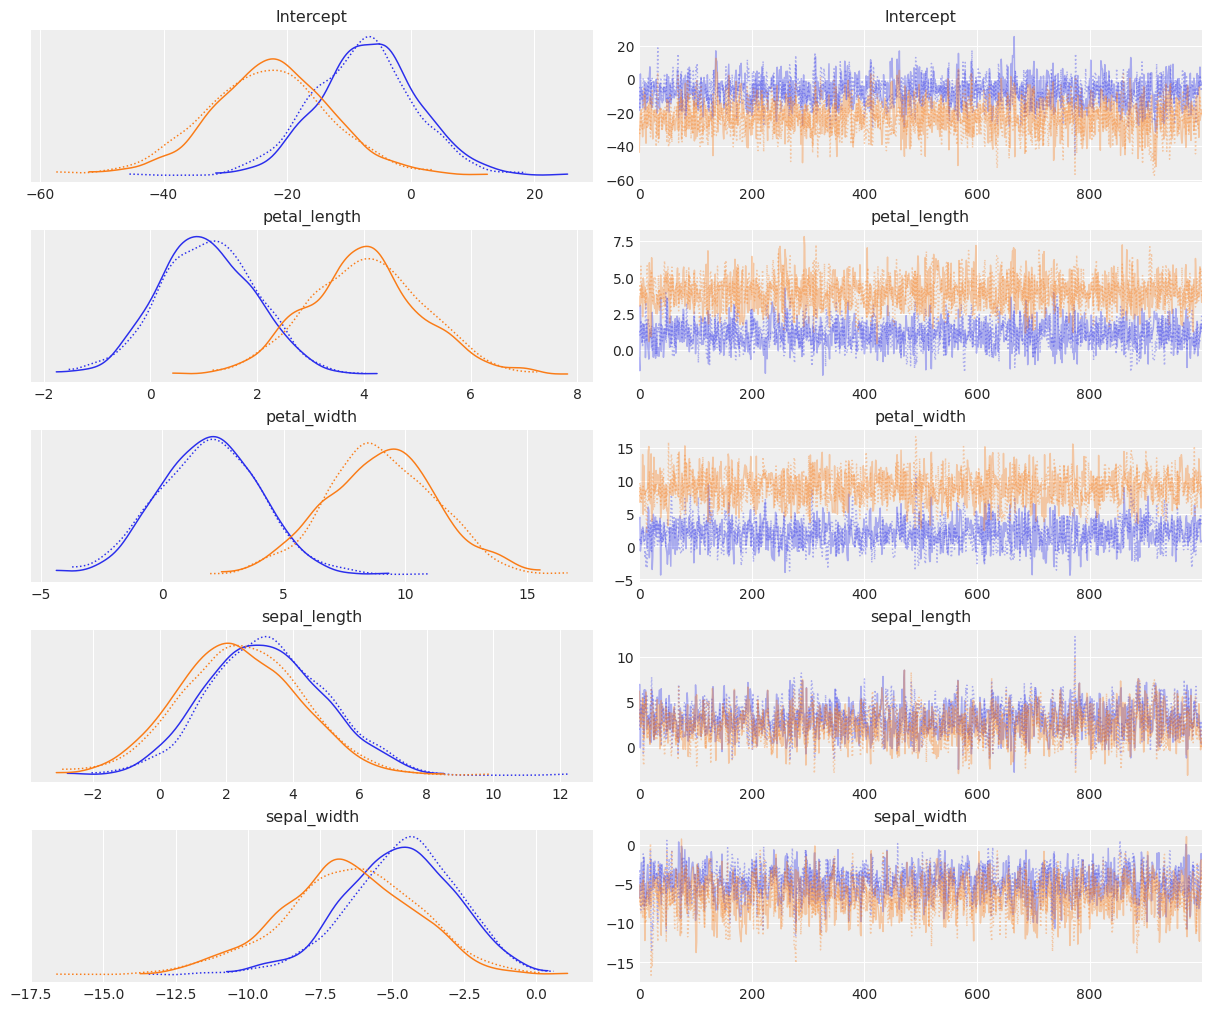

In [15]:
az.plot_trace(idata);